In [93]:
df = pd.read_excel('chart data.xlsx')

In [94]:
df.T

,0,1,2,3,4
No physical therapy,0.417,0.265,0.226,0.062,0.030
Physical therapy,0.478,0.236,0.217,0.051,0.018


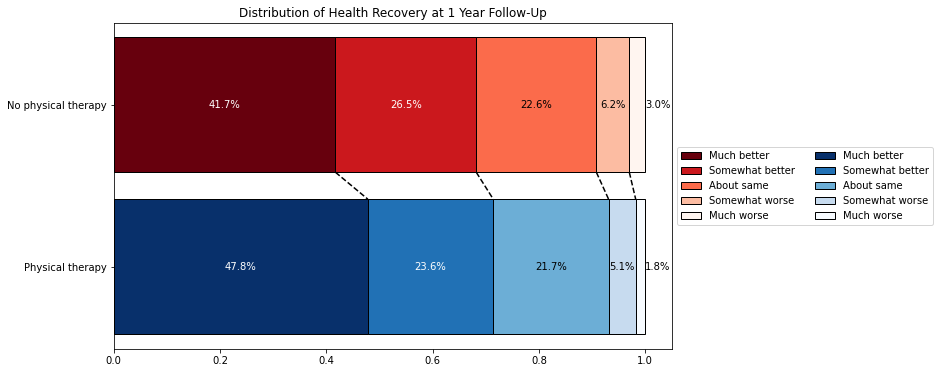

In [96]:
fig, ax = plt.subplots(figsize=(10,6))

category_names = ['Much better', 'Somewhat better', 'About same', 'Somewhat worse', 'Much worse']


left1=0
left2=0
color1 = iter(plt.colormaps['Reds_r'](np.linspace(0, 1, len(df))))
color2 = iter(plt.colormaps['Blues_r'](np.linspace(0, 1, len(df))))

# The main part
for i in range(len(df)):
    labcol = 'white' if (i < len(df)/2-1) else 'black'
    pos = 'center' if (i < len(df)-1) else 'edge'
    bar1 = ax.barh(y=0.6, width=df[['No physical therapy']].T.iloc[0,i], height=0.5, left=left1, color=next(color1), edgecolor = "black", label=category_names[i])
    bar2 = ax.barh(y=0, width=df[['Physical therapy']].T.iloc[0,i], height=0.5, left=left2, color=next(color2), edgecolor = "black", label=category_names[i])
    left1=df[['No physical therapy']].cumsum().values[i]
    left2=df[['Physical therapy']].cumsum().values[i]
    ax.bar_label(bar1, label_type=pos, color=labcol, labels=[f'{x:.1%}' for x in bar1.datavalues])
    ax.bar_label(bar2, label_type=pos, color=labcol, labels=[f'{x:.1%}' for x in bar2.datavalues])

# The connections
for i in range(len(df)-1):
    x1=df[['No physical therapy']].cumsum().values[i]
    x2=df[['Physical therapy']].cumsum().values[i]
    plt.plot([x1,x2], [0.6-0.25,0+0.25], color='black', ls='--')

# Legend
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[4], handles[6], handles[8],handles[1], handles[3], handles[5], handles[7], handles[9]]
labels = [labels[0], labels[2], labels[4], labels[6], labels[8], labels[1], labels[3], labels[5], labels[7], labels[9]]
ax.legend(handles, labels, numpoints=1,ncols=2,bbox_to_anchor=(1,0.5), loc='center left')

# Minor stuff
ax.set_title('Distribution of Health Recovery at 1 Year Follow-Up')
ax.set_yticks([0,0.6])
ax.set_yticklabels(['Physical therapy', 'No physical therapy']);